## Quiz #0801

### "Text Classification with Keras"

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import os
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import sequence
#from keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
#nltk.download('stopwords')
import nltk
nltk.download('punkt')
import seaborn as sns

#### Answer the following question by providing Python code:

1). Read in the movie review data from Cornell CS department. Carry out the EDA. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [ ]:
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [ ]:
len(my_docs)

1017

In [ ]:
y.shape

(1017,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


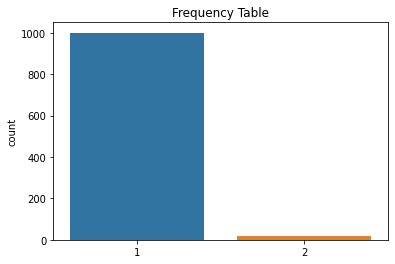

In [ ]:
sns.countplot(y).set_title("Frequency Table")
plt.show()

2). Carry out the data preprocessing: <br>
- Cleaning.
- Stopword removal.

In [ ]:
nltk.download('stopwords')
# collecting english stop words from nltk-library
stpw = stopwords.words('english')
    
# Adding custom stop-words
stpw.extend(['www','http','utc'])
stpw = set(stpw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
new_text = [x.decode('utf-8') for x in my_docs]

In [ ]:
#Cleaning 
for i in range(len(new_text)) : 
  # remove special characters/symbols
  new_text[i] = re.sub(r"\n", " ", new_text[i]) 
  new_text[i] = re.sub("[\<\[].*?[\>\]]", " ", new_text[i])
  #convert text to lower-case
  new_text[i] = new_text[i].lower()
  #retain only alphabets
  new_text[i] = re.sub(r"[^a-z ]", " ", new_text[i])
  #remove words less than 3 characters
  new_text[i] = re.sub(r"\b\w{1,3}\b", " ",new_text[i])

In [ ]:
#Stopword removal
for i in range(len(new_text)) : 
  new_text[i] = " ".join([x for x in new_text[i].split() if x not in stpw])

In [ ]:
corpus = new_text

3). Carry out label encoding by integers (required form by Keras):

In [ ]:
# Make a dictionary with the top words.
n_words = 2000  
words = []
for i in range(len(corpus)):
    words += nltk.word_tokenize(corpus[i])
top_words = pd.Series(words).value_counts().index
top_words = top_words[0:n_words]                     # Apply a limitation.
my_dict = {}
my_dict_inv = {}
for i in range(len(top_words)):
    my_dict_inv[i] = top_words[i]                   
    my_dict[top_words[i]] = i  

In [ ]:
# Convert the corpus into the label encoded form.
corpus_int =[]
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words2int = []
    for x in words:
        if x in my_dict:
            words2int += [my_dict[x]]
    corpus_int.append(words2int)

4). Prepare the data for AI: <br>
- Apply the padding.
- Split the data into training and testing.

In [ ]:
X = np.array(corpus_int)
y = np.array(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
# Padding: newswire lengths are uniformly matched to maxlen.
X = sequence.pad_sequences(X, maxlen = 100)

# y is already binary. Thus, there is no need to covert to the one-hot-encoding scheme.

In [ ]:
#split the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

5). Define the AI model (Embedding + LSTM):

In [ ]:
X_train.shape

(813, 100)

In [ ]:
y_train.shape

(813,)

In [ ]:
n_words

2000

In [ ]:
n_neurons = 100                    # Neurons within each memory cell.
n_input = 500                     # Dimension of the embeding space. 

In [ ]:
my_model = Sequential()
my_model.add(Embedding(n_words, n_input, input_length=n_neurons))
my_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
my_model.add(Dense(1, activation='sigmoid'))
print(my_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 500)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               240400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,240,501
Trainable params: 1,240,501
Non-trainable params: 0
_________________________________________________________________
None


6). Define the optimizer and compile the model:

In [ ]:
n_epochs = 15                      # Number of epochs.
batch_size = 100                    # Size of each batch.
learn_rate = 0.0001 

In [ ]:
opt = Adam(learning_rate=learn_rate)
my_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

7). Train the model and visualize the summary:

In [ ]:
history = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,validation_split=0.1)#,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/15
8/8 [==============================] - 12s 1s/step - loss: 0.0000e+00 - accuracy: 0.6183 - val_loss: 0.0000e+00 - val_accuracy: 0.7561
Epoch 2/15
8/8 [==============================] - 8s 927ms/step - loss: 0.0000e+00 - accuracy: 0.8632 - val_loss: 0.0000e+00 - val_accuracy: 0.9024
Epoch 3/15
8/8 [==============================] - 8s 940ms/step - loss: 0.0000e+00 - accuracy: 0.9398 - val_loss: 0.0000e+00 - val_accuracy: 0.9390
Epoch 4/15
8/8 [==============================] - 8s 938ms/step - loss: 0.0000e+00 - accuracy: 0.9740 - val_loss: 0.0000e+00 - val_accuracy: 0.9512
Epoch 5/15
8/8 [==============================] - 7s 931ms/step - loss: 0.0000e+00 - accuracy: 0.9808 - val_loss: 0.0000e+00 - val_accuracy: 0.9634
Epoch 6/15
8/8 [==============================] - 8s 931ms/step - loss: 0.0000e+00 - accuracy: 0.9850 - val_loss: 0.0000e+00 - val_accuracy: 0.9634
Epoch 7/15
8/8 [==============================] - 7s 922ms/step - loss: 0.0000e+00 - accuracy: 0.9850 - val_loss: 

8). Display the test result (accuracy):

In [ ]:
score = my_model.evaluate(X_test,y_test)
print('Test set accuracy: {:0.2f}'.format(score[1]))

7/7 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 0.9853
Test set accuracy: 0.99
